In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading the Data

In [46]:
big_mart_data = pd.read_csv('Test.csv')

Preliminary Data Analysis

In [47]:
big_mart_data.shape

(5681, 11)

In [48]:
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


* Item_Identifier column can be dropped

### Handling Missing Values

In [49]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Columns - Item_Weight & Outlet_Size - have missing values

In [50]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Item_Weight

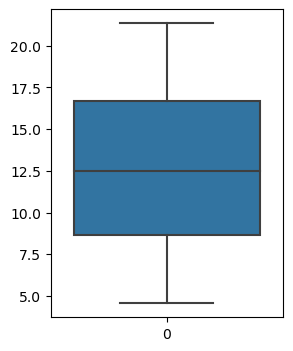

In [51]:
plt.figure(figsize=(3,4))
sns.boxplot(data=big_mart_data['Item_Weight'])
plt.show()

* The boxplot shows no outliers for Item_Weight, the missing values can be imputed with mean

Outlet_Size

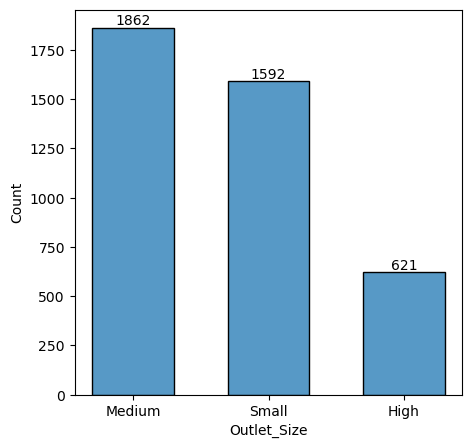

In [52]:
plt.figure(figsize=(5,5))
ax = sns.histplot(data=big_mart_data,x='Outlet_Size',shrink=0.6)
ax.bar_label(ax.containers[1])
plt.show()

In [53]:
big_mart_data['Outlet_Size'] = big_mart_data['Outlet_Size'].apply(lambda x: x if type(x)==str else 'Missing')

* nan values are mapped to 'Missing'

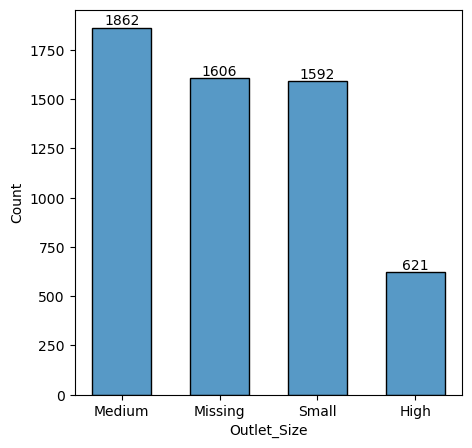

In [54]:
plt.figure(figsize=(5,5))
ax = sns.histplot(data=big_mart_data,x='Outlet_Size',shrink=0.6)
ax.bar_label(ax.containers[1])
plt.show()

In [55]:
tier = big_mart_data[['Outlet_Location_Type','Outlet_Type','Outlet_Size']].groupby(by=['Outlet_Location_Type','Outlet_Type'])

In [56]:
tier.value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           352
                      Supermarket Type1  Medium          620
                                         Small           620
Tier 2                Supermarket Type1  Missing        1236
                                         Small           620
Tier 3                Grocery Store      Missing         370
                      Supermarket Type1  High            621
                      Supermarket Type2  Medium          618
                      Supermarket Type3  Medium          624
dtype: int64

In [57]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Missing,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Missing,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Missing,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [58]:
outlet_location_type = sorted(big_mart_data['Outlet_Location_Type'].unique())

In [59]:
outlet_location_type

['Tier 1', 'Tier 2', 'Tier 3']

In [60]:
outlet_type = sorted(big_mart_data['Outlet_Type'].unique())

In [61]:
outlet_type

['Grocery Store',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3']

In [62]:
outlet_size = sorted([size for size in big_mart_data['Outlet_Size'].unique() if type(size) == str])

In [63]:
outlet_size

['High', 'Medium', 'Missing', 'Small']

In [ ]:
for i in outlet_type:
    for j in outlet_location_type:
        df = big_mart_data[(big_mart_data['Outlet_Type']==i) & (big_mart_data['Outlet_Location_Type']==j)]
        if not df.empty:
            sns.displot(data=df,x='Item_Outlet_Sales',hue='Outlet_Size',multiple='stack',kind='kde').set(title=f"{i},{j}",xlim=(0,6000))

* Outlet_Type and Outlet_Location_Type, with Item_Outlet_Sales can be used to deduct the missing Outlet_Size values
* Can Outlet_Size be dropped ?
* Outlet_Identifier can be dropped. If not, give that as the only input and keep all other options in backend

In [64]:
len(big_mart_data['Outlet_Identifier'].unique())

10

In [65]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Missing,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Missing,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Missing,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [66]:
df = big_mart_data[['Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']]
df.groupby(['Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']).size().reset_index().rename(columns={0:'Count'})

,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Identifier,Count
0,1985,Tier 1,Grocery Store,OUT019,352
1,1985,Tier 3,Supermarket Type3,OUT027,624
2,1987,Tier 3,Supermarket Type1,OUT013,621
3,1997,Tier 1,Supermarket Type1,OUT046,620
4,1998,Tier 3,Grocery Store,OUT010,370
5,1999,Tier 1,Supermarket Type1,OUT049,620
6,2002,Tier 2,Supermarket Type1,OUT045,619
7,2004,Tier 2,Supermarket Type1,OUT035,620
8,2007,Tier 2,Supermarket Type1,OUT017,617
9,2009,Tier 3,Supermarket Type2,OUT018,618


In [67]:
outlets = big_mart_data['Outlet_Identifier'].unique()
outlets

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [68]:
outlet_df = big_mart_data[['Outlet_Identifier','Outlet_Establishment_Year']].groupby(['Outlet_Identifier','Outlet_Establishment_Year']).size().reset_index().drop(columns=[0])
outlet_df

,Outlet_Identifier,Outlet_Establishment_Year
0,OUT010,1998
1,OUT013,1987
2,OUT017,2007
3,OUT018,2009
4,OUT019,1985
5,OUT027,1985
6,OUT035,2004
7,OUT045,2002
8,OUT046,1997
9,OUT049,1999


In [69]:
outlets = zip(list(outlet_df.Outlet_Identifier),list(outlet_df.Outlet_Establishment_Year))
outlets = sorted(list(outlets),key=lambda tup:tup[1])
outlets

[('OUT019', 1985),
 ('OUT027', 1985),
 ('OUT013', 1987),
 ('OUT046', 1997),
 ('OUT010', 1998),
 ('OUT049', 1999),
 ('OUT045', 2002),
 ('OUT035', 2004),
 ('OUT017', 2007),
 ('OUT018', 2009)]

* The older the store does not imply more sales
* Outlet_Establishment_Year can be dropped

In [70]:
big_mart_data.drop(columns=['Outlet_Establishment_Year'],inplace=True)

In [71]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,Missing,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,Missing,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Missing,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3


In [72]:
outlet_details = big_mart_data[['Outlet_Identifier','Outlet_Type','Outlet_Location_Type']].groupby(['Outlet_Identifier','Outlet_Type','Outlet_Location_Type']).size().reset_index().drop(columns=[0])
outlet_details

,Outlet_Identifier,Outlet_Type,Outlet_Location_Type
0,OUT010,Grocery Store,Tier 3
1,OUT013,Supermarket Type1,Tier 3
2,OUT017,Supermarket Type1,Tier 2
3,OUT018,Supermarket Type2,Tier 3
4,OUT019,Grocery Store,Tier 1
5,OUT027,Supermarket Type3,Tier 3
6,OUT035,Supermarket Type1,Tier 2
7,OUT045,Supermarket Type1,Tier 2
8,OUT046,Supermarket Type1,Tier 1
9,OUT049,Supermarket Type1,Tier 1


In [73]:
# HANDLE MISSING VALUES AND USE THIS AS outlet_details
big_mart_data[['Outlet_Identifier','Outlet_Type','Outlet_Location_Type','Outlet_Size']].groupby(['Outlet_Identifier','Outlet_Type','Outlet_Location_Type','Outlet_Size']).size().reset_index().drop(columns=[0])

,Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Outlet_Size
0,OUT010,Grocery Store,Tier 3,Missing
1,OUT013,Supermarket Type1,Tier 3,High
2,OUT017,Supermarket Type1,Tier 2,Missing
3,OUT018,Supermarket Type2,Tier 3,Medium
4,OUT019,Grocery Store,Tier 1,Small
5,OUT027,Supermarket Type3,Tier 3,Medium
6,OUT035,Supermarket Type1,Tier 2,Small
7,OUT045,Supermarket Type1,Tier 2,Missing
8,OUT046,Supermarket Type1,Tier 1,Small
9,OUT049,Supermarket Type1,Tier 1,Medium


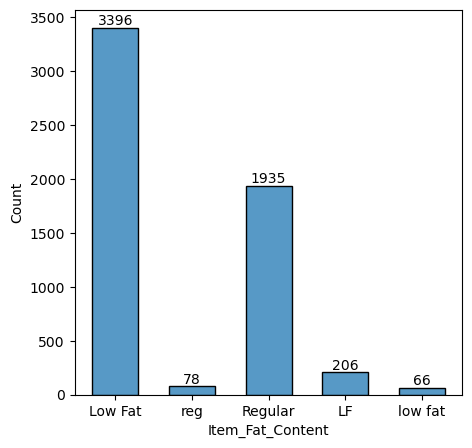

In [74]:
plt.figure(figsize=(5,5))
ax = sns.histplot(data=big_mart_data,x='Item_Fat_Content',shrink=0.6)
ax.bar_label(ax.containers[1])
plt.show()

In [75]:
big_mart_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [76]:
big_mart_data['Item_Fat_Content'] = big_mart_data['Item_Fat_Content'].apply(lambda x:'Low Fat' if x in ['Low Fat','low fat','LF'] else 'Regular')

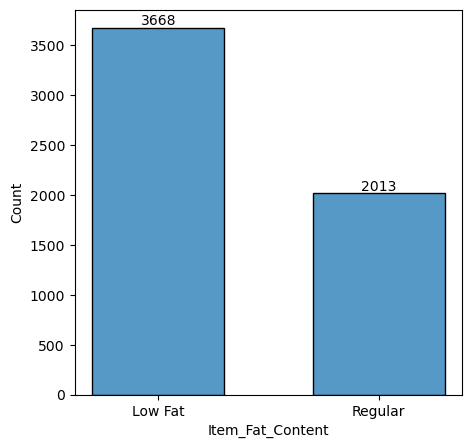

In [77]:
plt.figure(figsize=(5,5))
ax = sns.histplot(data=big_mart_data,x='Item_Fat_Content',shrink=0.6)
ax.bar_label(ax.containers[1])
plt.show()

* OneHotEncode Item_Fat_Content and Item_Type

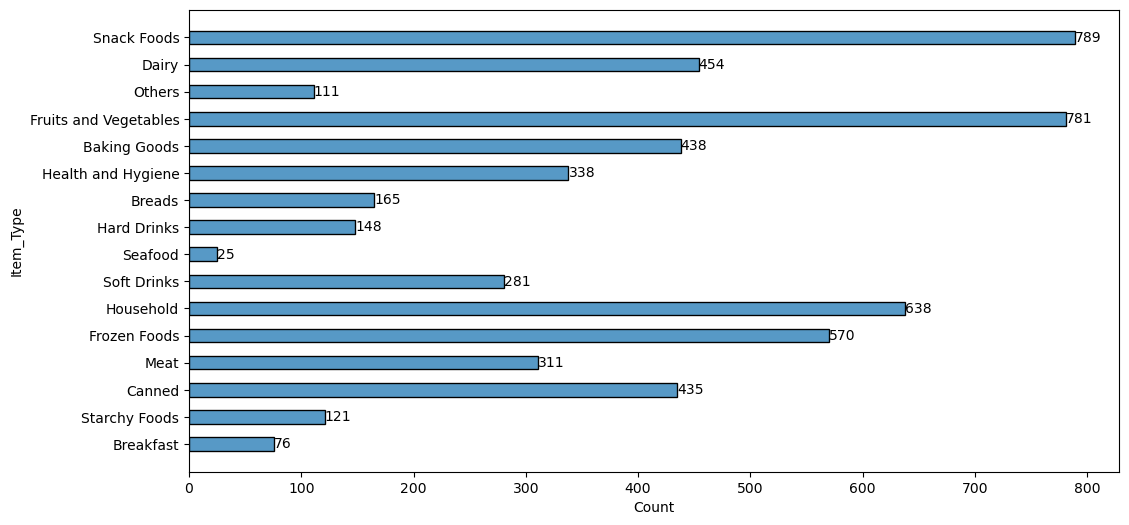

In [78]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=big_mart_data,y='Item_Type',shrink=0.5)
ax.bar_label(ax.containers[1])
plt.show()

In [79]:
big_mart_data['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [80]:
sorted(big_mart_data['Item_Type'].unique())

['Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks',
 'Starchy Foods']